In [1]:
import pickle
from copy import deepcopy
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('course_project_train.csv')

## Информация о датасете

In [3]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
TARGET_COLUMN = 'Credit Default'
CAT_FEATURES = []
NUM_FEATURES = []

## Обработка категориальных переменных

### Years in current job

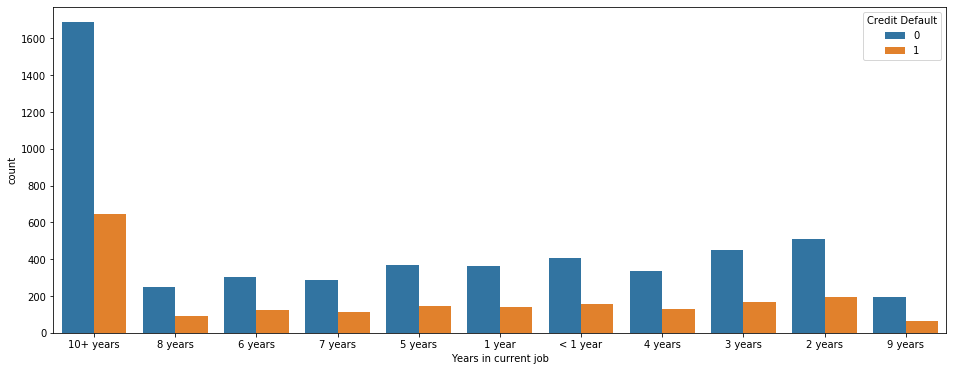

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Years in current job', hue=TARGET_COLUMN, data=df)

По критерию Пирсона, статистически все значения признака кроме NaN одинаково влияют на целевую переменную.  
Можно NaN сделать отдельным значением признака, остальные объединить

In [7]:
years_target = df.loc[(df['Years in current job'] == '10+ years') | (df['Years in current job'] == '< 1 year'), 
                      ['Term', 'Years in current job', TARGET_COLUMN]]
table = years_target.pivot_table(values='Term', index='Years in current job', columns=TARGET_COLUMN,
                                 aggfunc='count')
chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
p

0.7659589328829814

In [8]:
df['Years in current job'] = df['Years in current job'].apply(lambda x: 0 if pd.isnull(x) else 1)

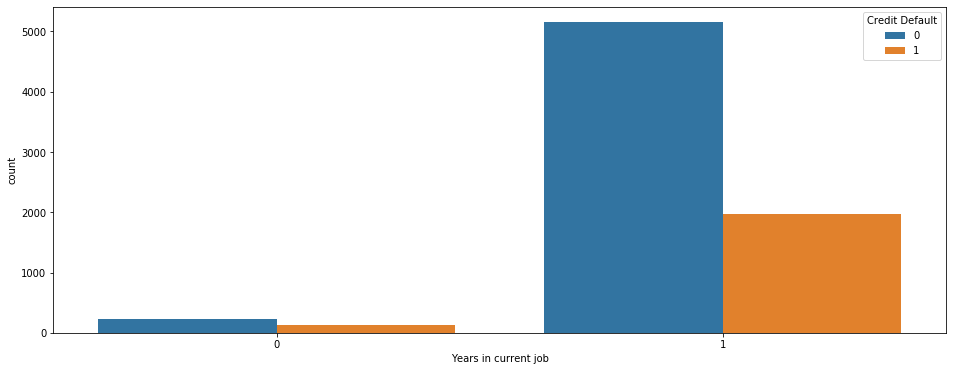

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Years in current job', hue=TARGET_COLUMN, data=df)

In [10]:
df['Years in current job'].value_counts()

1    7129
0     371
Name: Years in current job, dtype: int64

### Home Ownership

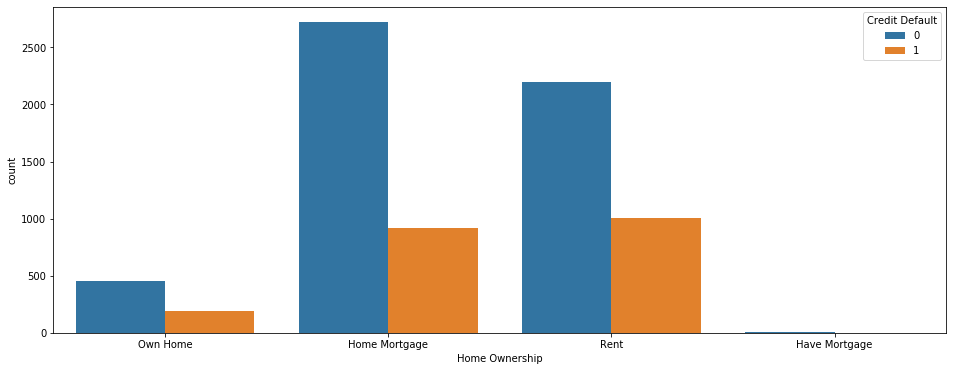

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Home Ownership', hue=TARGET_COLUMN, data=df)

По критерию Пирсона, статистически значения 'Own Home', 'Rent' одинаково влияют на целевую переменную, они объединяются в общую группу. Значения 'Home Mortgage', 'Have Mortgage' объединяются в общую по смыслу - 'Have Mortgage' имеет слабую статистику в представленном датасете чтобы получать количественные подтверждения.

In [12]:
column_name = 'Home Ownership'
years_target = df.loc[(df[column_name] == 'Own Home') | (df[column_name] == 'Rent'), 
                      ['Term', column_name, TARGET_COLUMN]]
table = years_target.pivot_table(values='Term', index=column_name, columns=TARGET_COLUMN,
                                 aggfunc='count')
print(table)
chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
p

Credit Default     0     1
Home Ownership            
Own Home         455   192
Rent            2201  1003


0.41388761719718237

In [13]:
def process_ownerchip(value):
    if value in ['Own Home', 'Rent']:
        return 0
    else:
        return 1

df['Home Ownership'] = df['Home Ownership'].apply(process_ownerchip)

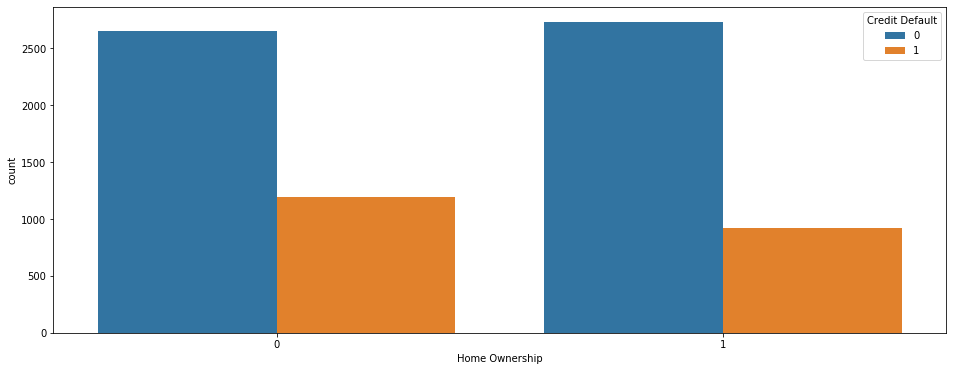

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Home Ownership', hue=TARGET_COLUMN, data=df)

In [15]:
df['Home Ownership'].value_counts()

0    3851
1    3649
Name: Home Ownership, dtype: int64

### Term

In [16]:
df['Term'] = df['Term'].apply(lambda x: 0 if x == 'Short Term' else 1)

### Purpose

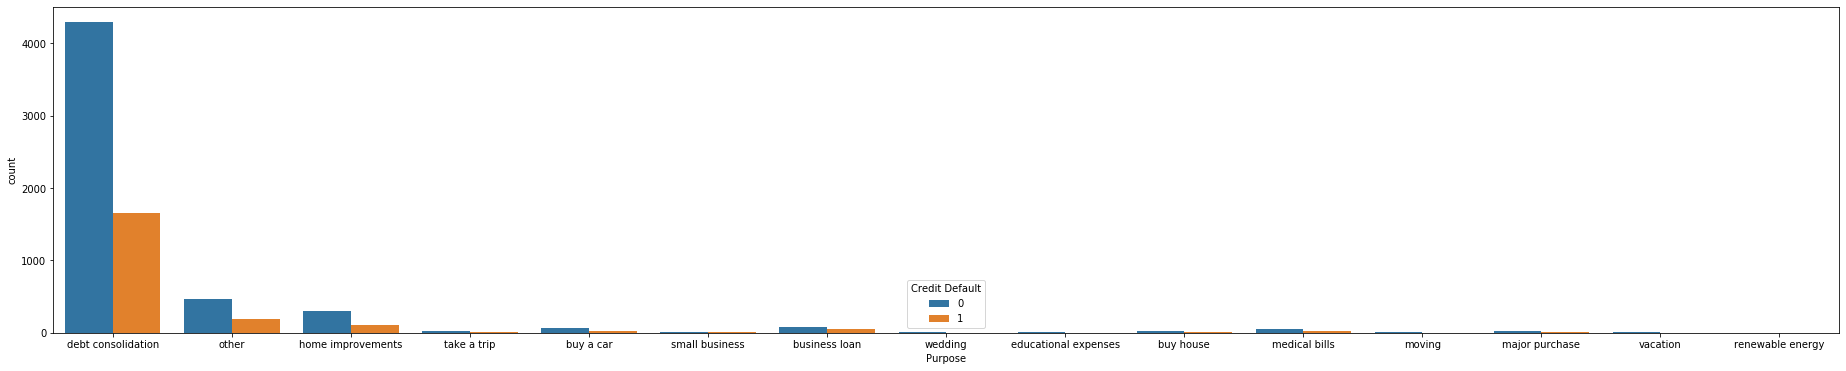

In [17]:
plt.figure(figsize=(32, 6))
sns.countplot(x='Purpose', hue=TARGET_COLUMN, data=df, )

Перебираем попарные комбинации значений признака, чтобы подтвердить или опровергнуть гипотезы о схожести их влияния на целевой признак

In [18]:
purpose = 'Purpose'
already = set()
for col_name1 in df[purpose].unique():
    for col_name2 in df[purpose].unique():
        if ((col_name1, col_name2) not in already) and (col_name1 != col_name2):
            years_target = df.loc[(df[purpose] == col_name1) | (df[purpose] == col_name2), 
                                  ['Term', purpose, TARGET_COLUMN]]
            table = years_target.pivot_table(values='Term', index=purpose, columns=TARGET_COLUMN,
                                             aggfunc='count')
            
            chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
            if p > 0.05:
                #print(table)
                #print(p)
                #print('='*50)
                already.add((col_name2, col_name1))
                already.add((col_name1, col_name2))

/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


Согласно критерия Пирсона, значения признака можно объединить в группы:
0. 'debt consolidation', 'other', 'home improvements', 'take a trip', 'buy a car', 'wedding', 'buy house', 'medical bills', 'major purchase'
1. 'business loan', 'small business'
2. остальные

In [19]:
def process_purpose(value):
    columns_0 = ['debt consolidation',
            'other',    
            'home improvements',
            'take a trip',
            'buy a car',
            'wedding',
            'buy house',
            'medical bills',
            'major purchase']
    columns_1 = ['business loan',
                 'small business']
    if value in columns_0:
        return 0
    elif value in columns_1:
        return 1
    else:
        return 2

df['Purpose'] = df['Purpose'].apply(process_purpose)

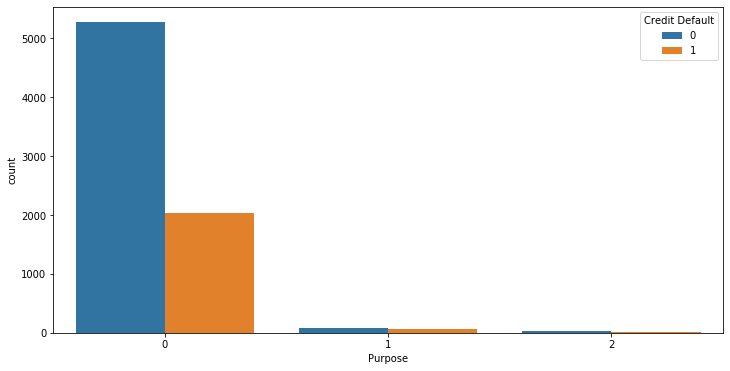

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Purpose', hue=TARGET_COLUMN, data=df, )

### Bankruptcies

In [21]:
df = df.loc[df['Bankruptcies'] >= 0]

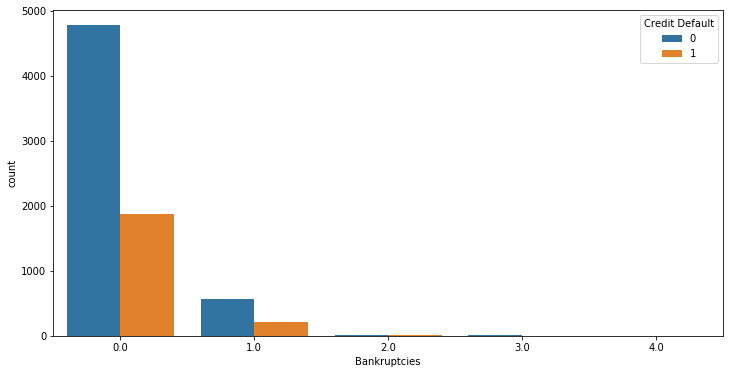

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Bankruptcies', hue=TARGET_COLUMN, data=df, )

Проверяем влияние значений признака на целевой

In [23]:
column_name = 'Bankruptcies'
already = set()
for col_name1 in df[column_name].unique():
    for col_name2 in df[column_name].unique():
        if ((col_name1, col_name2) not in already) and (col_name1 != col_name2):
            years_target = df.loc[(df[column_name] == col_name1) | (df[column_name] == col_name2), 
                                  ['Term', column_name, TARGET_COLUMN]]
            table = years_target.pivot_table(values='Term', index=column_name, columns=TARGET_COLUMN,
                                             aggfunc='count')
            
            chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
            if p > 0.05:
                print(table)
                print(p)
                print('='*50)
                already.add((col_name2, col_name1))
                already.add((col_name1, col_name2))

Credit Default     0     1
Bankruptcies              
0.0             4782  1878
1.0              569   217
0.7278918214239571
Credit Default    0    1
Bankruptcies            
1.0             569  217
3.0               5    2
0.9547434798624681
Credit Default    0    1
Bankruptcies            
1.0             569  217
2.0              20   11
0.3376141378065672
Credit Default    0    1
Bankruptcies            
1.0             569  217
4.0               1    1
0.47957212997467136
Credit Default     0     1
Bankruptcies              
0.0             4782  1878
3.0                5     2
0.9825006087049033
Credit Default     0     1
Bankruptcies              
0.0             4782  1878
2.0               20    11
0.3686015115073019
Credit Default     0     1
Bankruptcies              
0.0             4782  1878
4.0                1     1
0.49330145842923734
Credit Default   0   1
Bankruptcies          
2.0             20  11
3.0              5   2
0.7277003776552851
Credit Default  0  1
B

Значения признака Bankruptcies одинаково влияют на целевую переменную - признак можно удалить?

In [24]:
df = df.drop('Bankruptcies', axis=1)

### Tax Liens

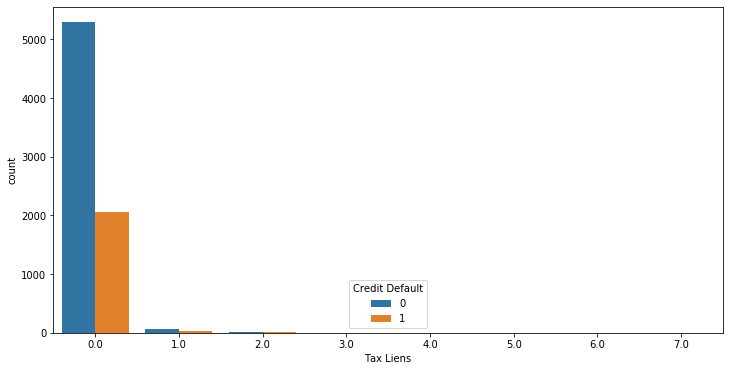

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Tax Liens', hue=TARGET_COLUMN, data=df, )

Проверяем влияние значений признака на целевой

In [26]:
column_name = 'Tax Liens'
already = set()
for col_name1 in df[column_name].unique():
    for col_name2 in df[column_name].unique():
        if ((col_name1, col_name2) not in already) and (col_name1 != col_name2):
            years_target = df.loc[(df[column_name] == col_name1) | (df[column_name] == col_name2), 
                                  ['Term', column_name, TARGET_COLUMN]]
            table = years_target.pivot_table(values='Term', index=column_name, columns=TARGET_COLUMN,
                                             aggfunc='count')
            
            chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
            if p > 0:
                #print(table)
                #print(p)
                #print('='*50)
                already.add((col_name2, col_name1))
                already.add((col_name1, col_name2))

/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


Выявлено, что значения признака можно разделить на 3 группы:
0. 0, 1
1. 2, 3, 4, 5
3. 6, 7

In [27]:
def process_tax(value):
    columns_0 = [0, 1]
    columns_1 = range(2, 6)
    columns_3 = [6, 7]
    if value in columns_0:
        return 0
    elif value in columns_1:
        return 1
    else:
        return 2

df['Tax Liens'] = df['Tax Liens'].apply(process_tax)

### Years of Credit History

Преобразуем года в 5 летние интервалы:

In [28]:
df['Years of Credit History'] /= 5
df['Years of Credit History'] = df['Years of Credit History'].astype(int)
df['Years of Credit History'].describe()

count    7486.000000
mean        3.185146
std         1.433793
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: Years of Credit History, dtype: float64

Заметим что есть различия во влиянии разных 5леток на целевой признак:

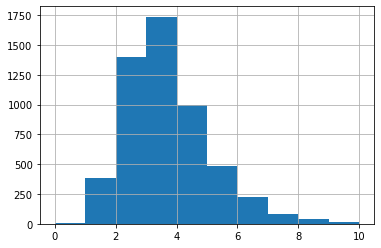

In [29]:
df.loc[df[TARGET_COLUMN]==0, 'Years of Credit History'].hist()

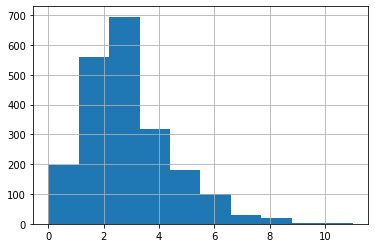

In [30]:
df.loc[df[TARGET_COLUMN]==1, 'Years of Credit History'].hist()

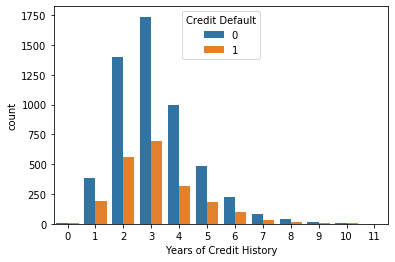

In [31]:
sns.countplot(x='Years of Credit History', hue=TARGET_COLUMN, data=df)

Исследуем влияние значений признака на целевой:

In [32]:
table = df.loc[(df['Years of Credit History']==0)|(df['Years of Credit History']==4), 
    ['Years of Credit History', 'Term', TARGET_COLUMN]].pivot_table(
    values='Term', index='Years of Credit History', columns=TARGET_COLUMN, aggfunc='count')
chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
p

0.8092129707014707

Выявлено, что значения признака можно сгруппировать в 2 группы:
0. 0, 1, 4, 6, 7, 8, 9, 10, 11
1. 2, 3, 5

In [33]:
def convert_years_credit_history(value):
    if (value in [0, 1, 4]) or value >= 6:
        return 0
    elif value in [2, 3, 5]:
        return 1
    else:
        return 2
df['Years of Credit History'] = df['Years of Credit History'].apply(convert_years_credit_history)

### Number of Credit Problems

In [34]:
problems = 'Number of Credit Problems'

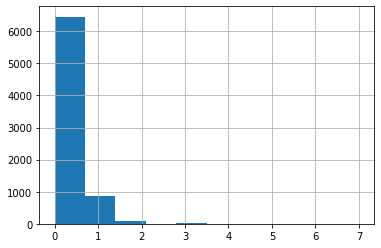

In [35]:
df[problems].hist()

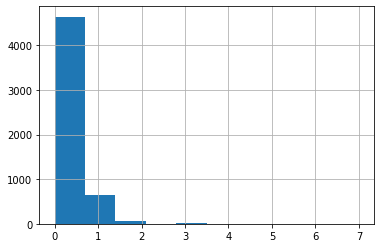

In [36]:
df.loc[df[TARGET_COLUMN]==0, problems].hist()

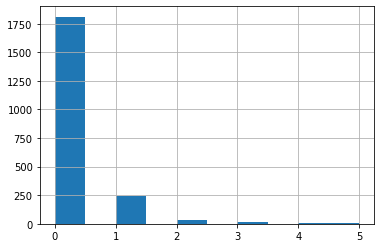

In [37]:
df.loc[df[TARGET_COLUMN]==1, problems].hist()

Признак можно преобразовать к категориальному:

In [38]:
table = df.loc[(df['Number of Credit Problems']==0)|(df['Number of Credit Problems']==2),
    ['Term', 'Number of Credit Problems', TARGET_COLUMN]].pivot_table(
    values='Term', index='Number of Credit Problems', columns=TARGET_COLUMN, aggfunc='count')
chi2, p, dof, expected = sp.stats.chi2_contingency(table, correction=False)
print(table)
p

Credit Default                0     1
Number of Credit Problems            
0.0                        4644  1811
2.0                          60    33


0.1138150321823744

При количестве проблем с кредитом более 1, значение признака 1, иначе 0

In [39]:
df['Number of Credit Problems'] = df['Number of Credit Problems'].apply(lambda x: 1 if x > 1 else 0)

### Список категориальных признаков

In [40]:
CAT_FEATURES = ['Years in current job', 'Home Ownership', 'Term', 'Purpose', 'Tax Liens', 'Years of Credit History']

In [41]:
CAT_FEATURES.append(problems)

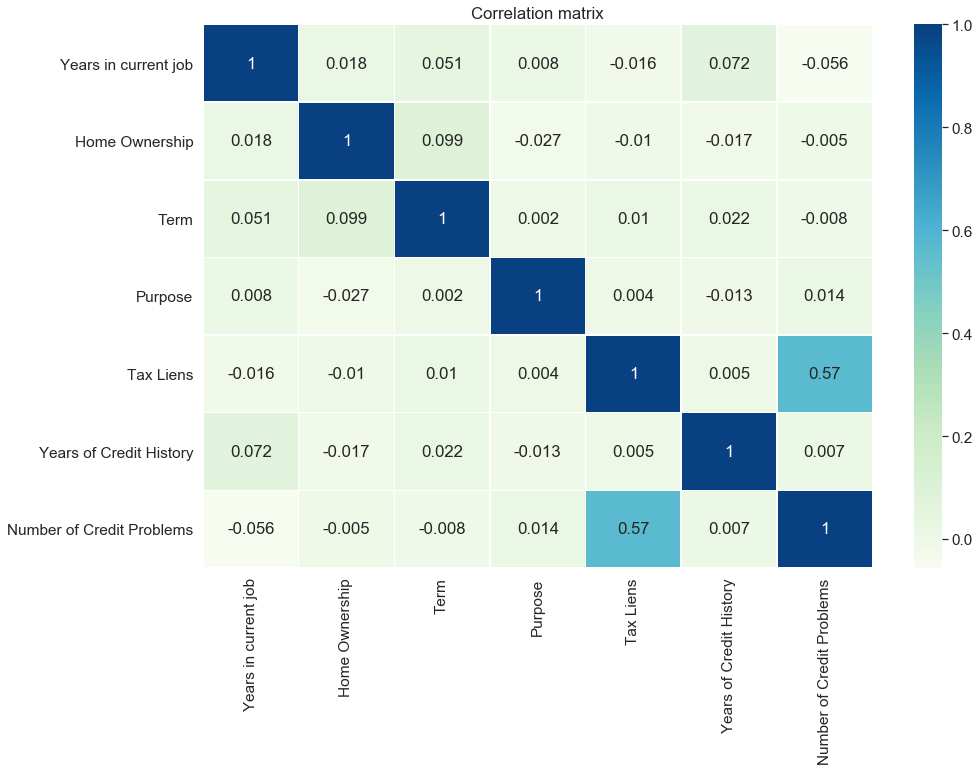

In [42]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
sns.heatmap(df[CAT_FEATURES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Заметим, что признаки Tax Liens и Number of Credit Problems достаточно скоррелированны, скомбинируем их в один кластеризацией

In [43]:
df_clust = df[['Tax Liens', 'Number of Credit Problems']]
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Tax Liens                  7486 non-null   int64
 1   Number of Credit Problems  7486 non-null   int64
dtypes: int64(2)
memory usage: 495.5 KB


In [44]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_clust)

In [45]:
with open('cluster_scaler.bin', 'wb') as f:
    pickle.dump(scaler, f)

In [46]:
inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=42)
    temp_model.fit(train_scaled)
    inertia_arr.append(temp_model.inertia_ )

<ipython-input-46-279199084f8c>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  temp_model.fit(train_scaled)
<ipython-input-46-279199084f8c>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  temp_model.fit(train_scaled)
<ipython-input-46-279199084f8c>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  temp_model.fit(train_scaled)
<ipython-input-46-279199084f8c>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  temp_model.fit(train_scaled)
<ipython-input-46-279199084f8c>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  temp_model.fit(train_scaled)


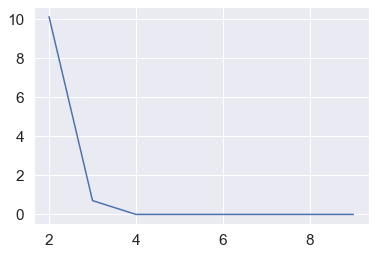

In [47]:
plt.plot([i for i in range(2, 10)], inertia_arr)

Судя по графику, можно в качестве количества кластеров выбрать 3

In [48]:
model = AgglomerativeClustering(n_clusters=3)

In [49]:
df['tax_problems'] = model.fit_predict(train_scaled)

In [50]:
with open('cluster_model.bin', 'wb') as f:
    pickle.dump(model, f)

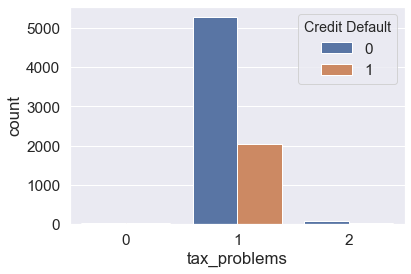

In [51]:
sns.countplot(x='tax_problems', hue=TARGET_COLUMN, data=df)

In [52]:
df.loc[df['tax_problems']==2, TARGET_COLUMN].value_counts()

0    65
1    33
Name: Credit Default, dtype: int64

In [53]:
df[CAT_FEATURES].describe()

,Years in current job,Home Ownership,Term,Purpose,Tax Liens,Years of Credit History,Number of Credit Problems
count,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000
mean,0.950441,0.487176,0.259685,0.028186,0.007213,0.675795,0.019904
std,0.217047,0.499869,0.438491,0.187467,0.089241,0.468108,0.139679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000


In [54]:
CAT_FEATURES = ['Years in current job', 'Home Ownership', 'Term', 'Purpose', 'Years of Credit History', 'tax_problems']

In [55]:
df[CAT_FEATURES] = df[CAT_FEATURES].astype('uint8')
df['tax_problems'] = df['tax_problems'].astype(object)
df['Purpose'] = df['Purpose'].astype(object)
df = pd.get_dummies(df)

In [56]:
CAT_FEATURES = ['Years in current job', 'Home Ownership', 'Term',
 'Years of Credit History', 'Purpose_0', 'Purpose_1', 'Purpose_2',
 'tax_problems_0', 'tax_problems_1', 'tax_problems_2']
df[CAT_FEATURES].describe()

,Years in current job,Home Ownership,Term,Years of Credit History,Purpose_0,Purpose_1,Purpose_2,tax_problems_0,tax_problems_1,tax_problems_2
count,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000
mean,0.950441,0.487176,0.259685,0.675795,0.975688,0.020438,0.003874,0.006813,0.980096,0.013091
std,0.217047,0.499869,0.438491,0.468108,0.154026,0.141503,0.062124,0.082263,0.139679,0.113673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Численные признаки

In [57]:
def get_feature_target_dfs(df, column_name):
    df_target = df.loc[:, [column_name, TARGET_COLUMN]]
    df_ = df_target[column_name]
    df_target_0 = df_.loc[df_target[TARGET_COLUMN] == 0]
    df_target_1 = df_.loc[df_target[TARGET_COLUMN] == 1]
    return df_target, df_target_0, df_target_1

In [58]:
df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Term', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Credit Default', 'Purpose_0', 'Purpose_1', 'Purpose_2',
       'tax_problems_0', 'tax_problems_1', 'tax_problems_2'],
      dtype='object')

In [59]:
lambdas = {}

### Maximum Open Credit

In [60]:
max_credit = 'Maximum Open Credit'

Исследуем распределение значений признака

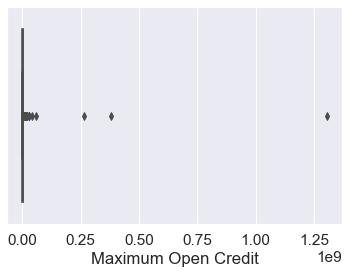

In [61]:
sns.boxplot(df[max_credit])

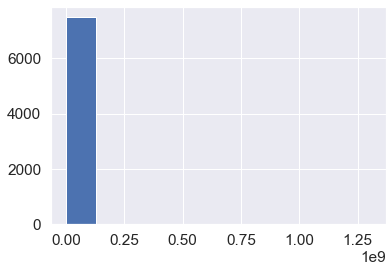

In [62]:
df[max_credit].hist()

In [63]:
df = df.loc[df[max_credit]>0]

Удалим выбросы:

In [64]:
quant25, quant75 = np.quantile(df[max_credit], [.25, .75])
iqr = sp.stats.iqr(df[max_credit])
df = df.loc[(df[max_credit] > quant25-3*iqr)&(df[max_credit] < quant75+3*iqr)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7255 non-null   uint8  
 1   Annual Income                 5759 non-null   float64
 2   Years in current job          7255 non-null   uint8  
 3   Tax Liens                     7255 non-null   int64  
 4   Number of Open Accounts       7255 non-null   float64
 5   Years of Credit History       7255 non-null   uint8  
 6   Maximum Open Credit           7255 non-null   float64
 7   Number of Credit Problems     7255 non-null   int64  
 8   Months since last delinquent  3314 non-null   float64
 9   Term                          7255 non-null   uint8  
 10  Current Loan Amount           7255 non-null   float64
 11  Current Credit Balance        7255 non-null   float64
 12  Monthly Debt                  7255 non-null   float64
 13  Cre

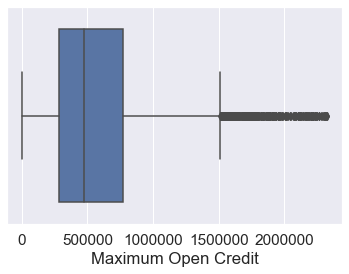

In [65]:
sns.boxplot(df[max_credit])

Исследуем признак на нормальность и статистическую значимость:

In [66]:
max_credit_target, max_credit_target_0, max_credit_target_1 = get_feature_target_dfs(df, max_credit)

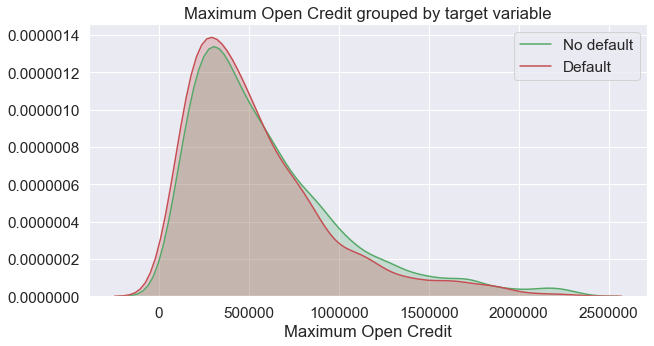

In [67]:
plt.figure(figsize=(10, 5))

sns.kdeplot(max_credit_target_0, shade=True, label='No default', color='g')
sns.kdeplot(max_credit_target_1, shade=True, label='Default', color='r')

plt.xlabel(max_credit)
plt.title(f'{max_credit} grouped by target variable')
plt.show()

In [68]:
sp.stats.shapiro(max_credit_target[max_credit].sample(1000))

(0.8816105127334595, 6.253527655420398e-27)

Распределение не нормальное.Приблизим к нормальному

In [69]:
df[max_credit], lambdas['max_credit_lambda'] = sp.stats.yeojohnson(df[max_credit])

In [70]:
max_credit_target, max_credit_target_0, max_credit_target_1 = get_feature_target_dfs(df, max_credit)

In [71]:
st, p =sp.stats.ttest_ind(max_credit_target_0, max_credit_target_1)
p

3.276521918332754e-08

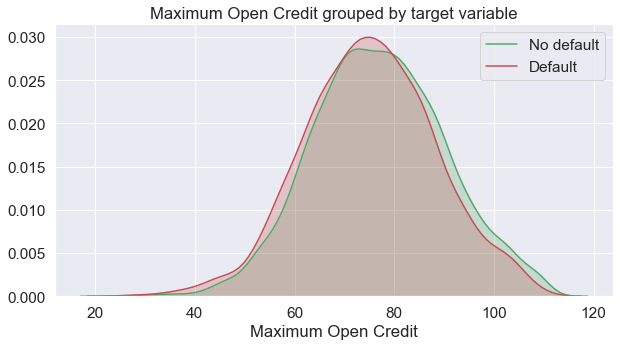

In [72]:
plt.figure(figsize=(10, 5))

sns.kdeplot(max_credit_target_0, shade=True, label='No default', color='g')
sns.kdeplot(max_credit_target_1, shade=True, label='Default', color='r')

plt.xlabel(max_credit)
plt.title(f'{max_credit} grouped by target variable')
plt.show()

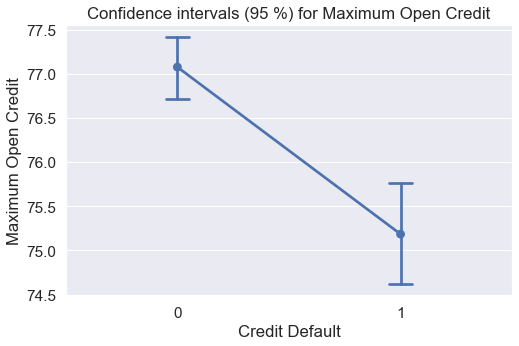

In [73]:
plt.figure(figsize=(8, 5))
sns.pointplot(x=TARGET_COLUMN, y=max_credit, data=max_credit_target, capsize=.1)
plt.title(f'Confidence intervals (95 %) for {max_credit}')
plt.show()

Статистически значимое, принимается как признак:

In [74]:
NUM_FEATURES.append(max_credit)

### Current Credit Balance

In [75]:
df1 = deepcopy(df)

In [76]:
credit_balance = 'Current Credit Balance'

Изучим распределение:

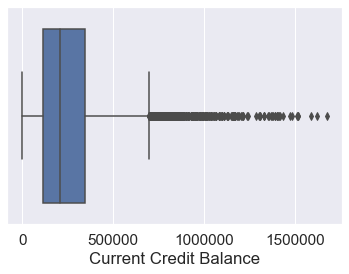

In [77]:
sns.boxplot(df[credit_balance])

Удалим выбросы:

In [78]:
quant25, quant75 = np.quantile(df[credit_balance], [0.25, 0.75])
iqr = sp.stats.iqr(df[credit_balance])
df = df.loc[(df['Current Credit Balance'] > quant25-3*iqr)&(df['Current Credit Balance'] < quant75+3*iqr)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7185 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7185 non-null   uint8  
 1   Annual Income                 5700 non-null   float64
 2   Years in current job          7185 non-null   uint8  
 3   Tax Liens                     7185 non-null   int64  
 4   Number of Open Accounts       7185 non-null   float64
 5   Years of Credit History       7185 non-null   uint8  
 6   Maximum Open Credit           7185 non-null   float64
 7   Number of Credit Problems     7185 non-null   int64  
 8   Months since last delinquent  3297 non-null   float64
 9   Term                          7185 non-null   uint8  
 10  Current Loan Amount           7185 non-null   float64
 11  Current Credit Balance        7185 non-null   float64
 12  Monthly Debt                  7185 non-null   float64
 13  Cre

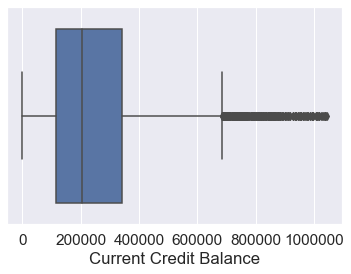

In [79]:
sns.boxplot(df[credit_balance])

Исследуем признак на нормальность и статистическую значимость:

In [80]:
credit_balance_target, credit_balance_target_0, credit_balance_target_1 = get_feature_target_dfs(df, credit_balance)

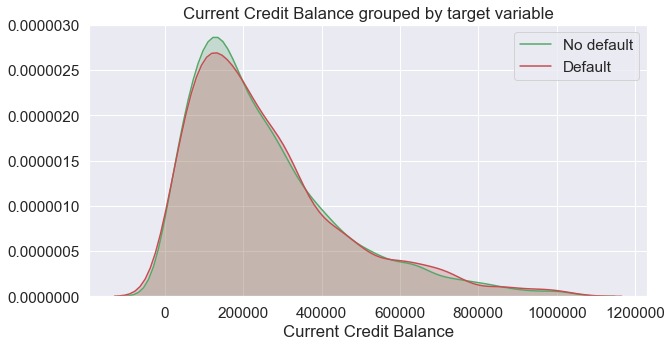

In [81]:
plt.figure(figsize=(10, 5))

sns.kdeplot(credit_balance_target_0, shade=True, label='No default', color='g')
sns.kdeplot(credit_balance_target_1, shade=True, label='Default', color='r')

plt.xlabel(credit_balance)
plt.title(f'{credit_balance} grouped by target variable')
plt.show()

In [82]:
sp.stats.shapiro(credit_balance_target[credit_balance].sample(1000))

(0.8922543525695801, 7.514652621578008e-26)

Распределение не нормальное

In [83]:
df[credit_balance], lambdas['credit_balance_lambda'] = sp.stats.yeojohnson(df[credit_balance])

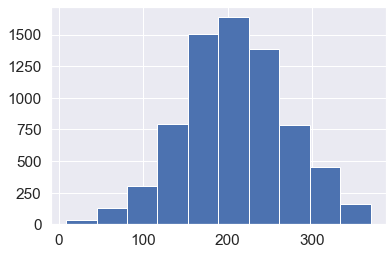

In [84]:
df[credit_balance].hist()

In [85]:
credit_balance_target, credit_balance_target_0, credit_balance_target_1 = get_feature_target_dfs(df, credit_balance)

In [86]:
sp.stats.ttest_ind(credit_balance_target_0, credit_balance_target_1)

Ttest_indResult(statistic=-0.6675084512399466, pvalue=0.5044688571677702)

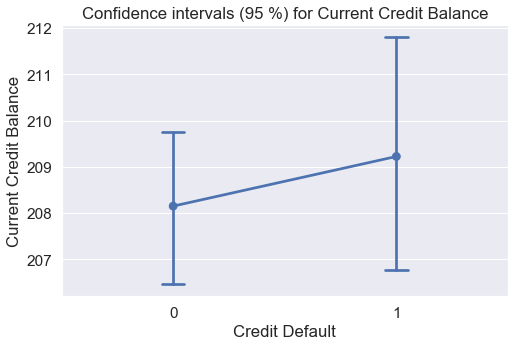

In [87]:
plt.figure(figsize=(8, 5))
sns.pointplot(x=TARGET_COLUMN, y=credit_balance, data=credit_balance_target, capsize=.1)
plt.title(f'Confidence intervals (95 %) for {credit_balance}')
plt.show()

Статистически не значимое

### Current Loan Amount

In [88]:
loan_amount = 'Current Loan Amount'

Изучим распределение значений:

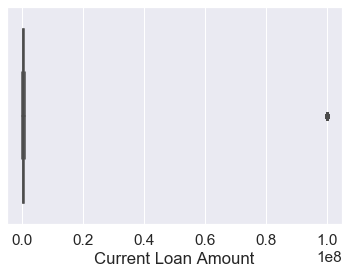

In [89]:
sns.boxplot(df[loan_amount])

In [90]:
df['Current Loan Amount'].min()

21472.0

In [91]:
df.loc[df[loan_amount] == 99999999.0, TARGET_COLUMN].value_counts()

0    824
Name: Credit Default, dtype: int64

Заметим, что значение 99999999.0 особенное, при нем никогда не наблюдается дефолт.  
Сделаем из этого значения отдельный бинарный признак:

In [92]:
df['Current Loan Max'] = (df[loan_amount] / 99999999.0)
df['Current Loan Max'] = df['Current Loan Max'].astype(int)

In [93]:
CAT_FEATURES.append('Current Loan Max')

Значения равные 99999999.0 сместим в район матожидания признака при целевой переменной 0:

In [94]:
df.loc[df[loan_amount] == 99999999.0, loan_amount] = 0

In [95]:
print(df.loc[df[loan_amount] > 0, loan_amount].median())

264704.0


In [96]:
df.loc[df[loan_amount] == 0, loan_amount] = 264704.0

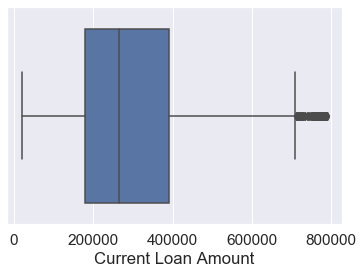

In [97]:
sns.boxplot(df[loan_amount])

In [98]:
quant25, quant75 = np.quantile(df['Current Loan Amount'], [0.25, 0.75])
iqr = quant75 - quant25
print(quant25, quant75, iqr)
df = df.loc[(df['Current Loan Amount'] > quant25-3*iqr)&(df['Current Loan Amount'] < quant75+3*iqr)]

179454.0 391798.0 212344.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7185 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7185 non-null   uint8  
 1   Annual Income                 5700 non-null   float64
 2   Years in current job          7185 non-null   uint8  
 3   Tax Liens                     7185 non-null   int64  
 4   Number of Open Accounts       7185 non-null   float64
 5   Years of Credit History       7185 non-null   uint8  
 6   Maximum Open Credit           7185 non-null   float64
 7   Number of Credit Problems     7185 non-null   int64  
 8   Months since last delinquent  3297 non-null   float64
 9   Term                          7185 non-null   uint8  
 10  Current Loan Amount           7185 non-null   float64
 11  Current Credit Balance        7185 non-null   float64
 12  Monthly Debt                  7185 non-null   float64
 13  Cre

Изучим признак на нормальность и статистическую значимость:

In [100]:
loan_amount_target, loan_amount_target_0, loan_amount_target_1 = get_feature_target_dfs(df, loan_amount)

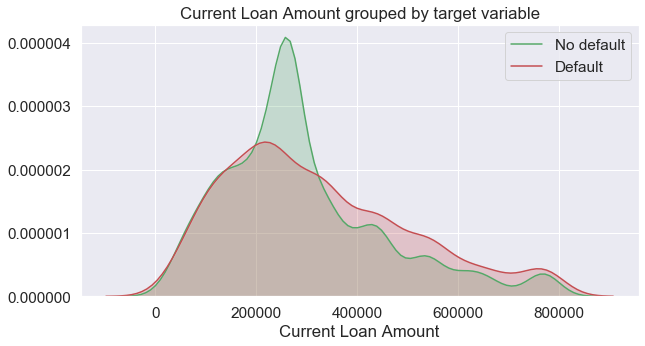

In [101]:
plt.figure(figsize=(10, 5))

sns.kdeplot(loan_amount_target_0, shade=True, label='No default', color='g')
sns.kdeplot(loan_amount_target_1, shade=True, label='Default', color='r')

plt.xlabel(loan_amount)
plt.title(f'{loan_amount} grouped by target variable')
plt.show()

In [102]:
sp.stats.shapiro(loan_amount_target[loan_amount].sample(1000))

(0.939376175403595, 9.113737048615744e-20)

In [103]:
df[loan_amount], lambdas['loan_amount_lambda'] = sp.stats.yeojohnson(df[loan_amount])

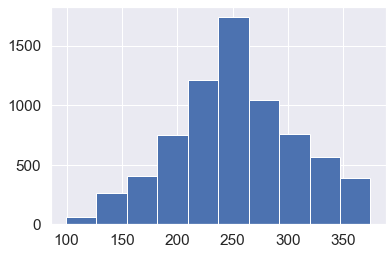

In [104]:
df[loan_amount].hist()

In [105]:
loan_amount_target, loan_amount_target_0, loan_amount_target_1 = get_feature_target_dfs(df, loan_amount)

In [106]:
sp.stats.ttest_ind(loan_amount_target_0, loan_amount_target_1)

Ttest_indResult(statistic=-5.813104367756056, pvalue=6.395132814897647e-09)

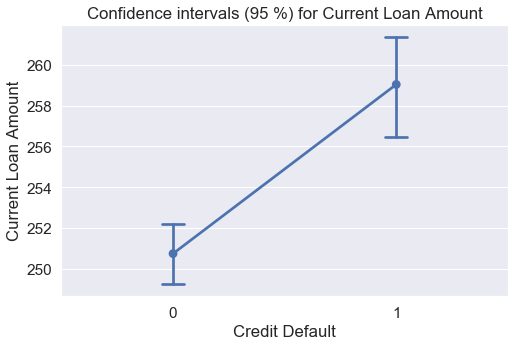

In [107]:
plt.figure(figsize=(8, 5))
sns.pointplot(x=TARGET_COLUMN, y=loan_amount, data=loan_amount_target, capsize=.1)
plt.title(f'Confidence intervals (95 %) for {loan_amount}')
plt.show()

Признак статистически значим, принимается:

In [108]:
NUM_FEATURES.append(loan_amount)

### Number of Open Accounts

In [109]:
number_accounts = 'Number of Open Accounts'

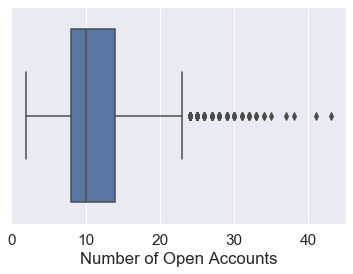

In [110]:
sns.boxplot(df[number_accounts])

Удаляем выбросы

In [111]:
quant25, quant75 = np.quantile(df[number_accounts], [0.25, 0.75])
iqr = quant75 - quant25
print(quant25, quant75, iqr)
df = df.loc[(df[number_accounts] > quant25-3*iqr)&(df[number_accounts] < quant75+3*iqr)]

8.0 14.0 6.0


In [112]:
accounts_target, accounts_target_0, accounts_target_1 = get_feature_target_dfs(df, number_accounts)

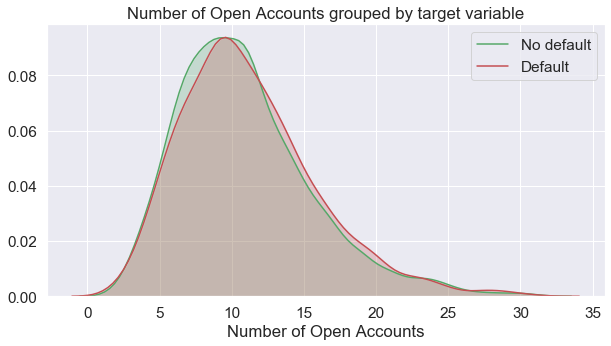

In [113]:
plt.figure(figsize=(10, 5))
sns.kdeplot(accounts_target_0, shade=True, label='No default', color='g')
sns.kdeplot(accounts_target_1, shade=True, label='Default', color='r')
plt.xlabel(number_accounts)
plt.title(f'{number_accounts} grouped by target variable')
plt.show()

In [114]:
sp.stats.shapiro(df[number_accounts].sample(4500))

(0.9505707621574402, 1.7152569413922706e-36)

In [115]:
df[number_accounts], lambdas['number_accounts_lambda'] = sp.stats.yeojohnson(df[number_accounts])

In [116]:
accounts_target, accounts_target_0, accounts_target_1 = get_feature_target_dfs(df, number_accounts)

In [117]:
sp.stats.ttest_ind(accounts_target_0, accounts_target_1)

Ttest_indResult(statistic=-2.4187169548817655, pvalue=0.015600109180067864)

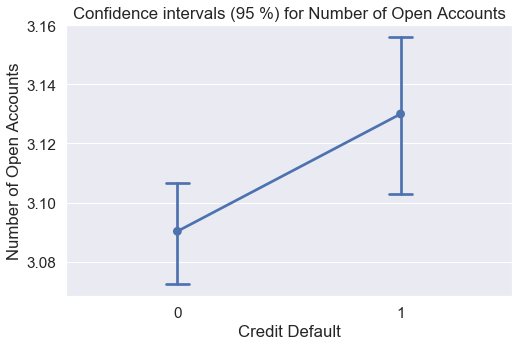

In [118]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_COLUMN, y=number_accounts, data=accounts_target, capsize=.1)

plt.title(f'Confidence intervals (95 %) for {number_accounts}')
plt.show()

Статистически значим, хотя есть незначительное пересечение доверительных интервалов, принимается:

In [119]:
NUM_FEATURES.append(number_accounts)

### Monthly Debt

In [120]:
month_dept = 'Monthly Debt'

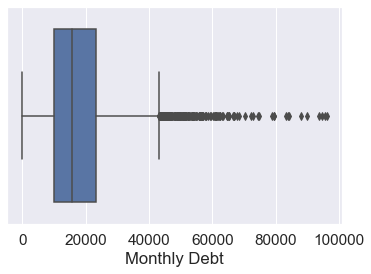

In [121]:
sns.boxplot(df[month_dept])

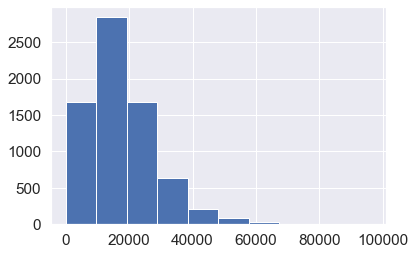

In [122]:
df[month_dept].hist()

In [123]:
quant25, quant75 = np.quantile(df[month_dept], [0.25, 0.75])
iqr = quant75 - quant25
print(quant25, quant75, iqr)
df = df.loc[(df[month_dept] > quant25-3*iqr)&(df[month_dept] < quant75+3*iqr)]

10015.0 23290.25 13275.25


In [124]:
df[month_dept], lambdas['month_dept_lambda'] = sp.stats.yeojohnson(df[month_dept])

В качестве признака интересно рассмотреть признак отношение зарплаты к ежемесячному платежу

In [125]:
debt_target, debt_target_0, debt_target_1 = get_feature_target_dfs(df, month_dept)

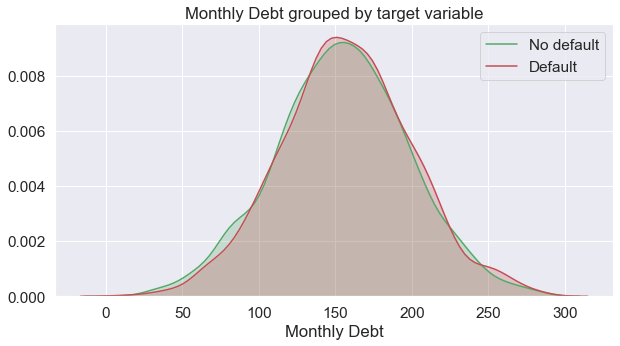

In [126]:
plt.figure(figsize=(10, 5))
sns.kdeplot(debt_target_0, shade=True, label='No default', color='g')
sns.kdeplot(debt_target_1, shade=True, label='Default', color='r')
plt.xlabel(month_dept)
plt.title(f'{month_dept} grouped by target variable')
plt.show()

In [127]:
sp.stats.shapiro(debt_target[month_dept].sample(5000))

(0.9991303086280823, 0.012255335226655006)

In [128]:
sp.stats.ttest_ind(debt_target_0, debt_target_1)

Ttest_indResult(statistic=-2.337708930680892, pvalue=0.019429839702574683)

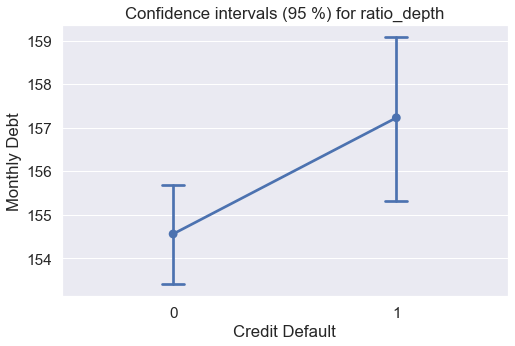

In [129]:
plt.figure(figsize=(8, 5))
sns.pointplot(x=TARGET_COLUMN, y=month_dept, data=debt_target, capsize=.1)
plt.title(f'Confidence intervals (95 %) for ratio_depth')
plt.show()

Статистически значим, принимается:

In [130]:
NUM_FEATURES.append(month_dept)

### Annual Income

In [131]:
annual_income = 'Annual Income'

Изучим распределение значений признака:

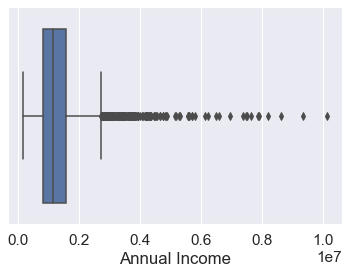

In [132]:
sns.boxplot(df[annual_income])

In [133]:
df[annual_income].count()

5665

In [134]:
df_with_income = df.loc[(df[annual_income] >= 0)]

In [135]:
quant25, quant75 = np.quantile(df_with_income[annual_income], [.25, .75])
iqr = sp.stats.iqr(df_with_income[annual_income])
iqr

757739.0

In [136]:
df_with_income = df_with_income.loc[(df_with_income[annual_income] > quant25-3*iqr) &
                                           (df_with_income[annual_income] < quant75+3*iqr)]


Заполним недостающие значения признака медианными:

In [137]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [138]:
df1 = deepcopy(df)

In [139]:
df1 = df1[CAT_FEATURES+['Maximum Open Credit', 'Number of Open Accounts','Current Loan Amount', 
                        'Current Credit Balance', 'Monthly Debt', 'Annual Income']]

In [140]:
df1.loc[df_with_income.index, 'Annual Income'] = df_with_income['Annual Income']

In [141]:
df_income_train = df1.loc[df1[annual_income]>0]
df_income_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5665 entries, 0 to 7497
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Years in current job     5665 non-null   uint8  
 1   Home Ownership           5665 non-null   uint8  
 2   Term                     5665 non-null   uint8  
 3   Years of Credit History  5665 non-null   uint8  
 4   Purpose_0                5665 non-null   uint8  
 5   Purpose_1                5665 non-null   uint8  
 6   Purpose_2                5665 non-null   uint8  
 7   tax_problems_0           5665 non-null   uint8  
 8   tax_problems_1           5665 non-null   uint8  
 9   tax_problems_2           5665 non-null   uint8  
 10  Current Loan Max         5665 non-null   int64  
 11  Maximum Open Credit      5665 non-null   float64
 12  Number of Open Accounts  5665 non-null   float64
 13  Current Loan Amount      5665 non-null   float64
 14  Current Credit Balance  

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Years in current job     7139 non-null   uint8  
 1   Home Ownership           7139 non-null   uint8  
 2   Term                     7139 non-null   uint8  
 3   Years of Credit History  7139 non-null   uint8  
 4   Purpose_0                7139 non-null   uint8  
 5   Purpose_1                7139 non-null   uint8  
 6   Purpose_2                7139 non-null   uint8  
 7   tax_problems_0           7139 non-null   uint8  
 8   tax_problems_1           7139 non-null   uint8  
 9   tax_problems_2           7139 non-null   uint8  
 10  Current Loan Max         7139 non-null   int64  
 11  Maximum Open Credit      7139 non-null   float64
 12  Number of Open Accounts  7139 non-null   float64
 13  Current Loan Amount      7139 non-null   float64
 14  Current Credit Balance  

In [143]:
df_income_res = df1.loc[pd.isnull(df1[annual_income])]

In [144]:
scaler = StandardScaler()

In [145]:
NUM_FEAT = ['Maximum Open Credit', 'Number of Open Accounts',
            'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt']

In [146]:
df_income_train[NUM_FEAT] = scaler.fit_transform(df_income_train[NUM_FEAT])

<ipython-input-146-1775d438ad43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_train[NUM_FEAT] = scaler.fit_transform(df_income_train[NUM_FEAT])
/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [147]:
with open('annual_scaler.bin', 'wb') as f:
    pickle.dump(scaler, f)

In [148]:
params = {
    'min_samples_leaf':[3, 5, 7, 10], 
    'n_estimators':[25, 50, 75, 100], 
    'max_depth':[3, 5, 7, 10],}
regr = GridSearchCV(RFR(),param_grid=params,cv=2)

In [149]:
FEATURES = CAT_FEATURES + NUM_FEAT
FEATURES

['Years in current job',
 'Home Ownership',
 'Term',
 'Years of Credit History',
 'Purpose_0',
 'Purpose_1',
 'Purpose_2',
 'tax_problems_0',
 'tax_problems_1',
 'tax_problems_2',
 'Current Loan Max',
 'Maximum Open Credit',
 'Number of Open Accounts',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt']

In [150]:
regr.fit(df_income_train.loc[:, FEATURES], df_income_train['Annual Income'])

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [151]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 100}

In [152]:
regr.best_score_

0.36737963655104755

In [153]:
regressor = RFR(max_depth=7, min_samples_leaf=7, n_estimators=50, n_jobs=-1)

In [154]:
regressor.fit(df_income_train.loc[:, FEATURES], df_income_train['Annual Income'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [155]:
with open('annual_regressor.bin', 'wb') as f:
    pickle.dump(regressor, f)

In [156]:
df_income_train['Annual Income'].describe()

count    5.665000e+03
mean     1.315197e+06
std      7.587660e+05
min      1.645970e+05
25%      8.346510e+05
50%      1.152996e+06
75%      1.592390e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [157]:
df_income_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 5 to 7499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Years in current job     1474 non-null   uint8  
 1   Home Ownership           1474 non-null   uint8  
 2   Term                     1474 non-null   uint8  
 3   Years of Credit History  1474 non-null   uint8  
 4   Purpose_0                1474 non-null   uint8  
 5   Purpose_1                1474 non-null   uint8  
 6   Purpose_2                1474 non-null   uint8  
 7   tax_problems_0           1474 non-null   uint8  
 8   tax_problems_1           1474 non-null   uint8  
 9   tax_problems_2           1474 non-null   uint8  
 10  Current Loan Max         1474 non-null   int64  
 11  Maximum Open Credit      1474 non-null   float64
 12  Number of Open Accounts  1474 non-null   float64
 13  Current Loan Amount      1474 non-null   float64
 14  Current Credit Balance  

In [158]:
df_income_res[NUM_FEAT] = scaler.transform(df_income_res[NUM_FEAT])

<ipython-input-158-7639fb00f29e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_res[NUM_FEAT] = scaler.transform(df_income_res[NUM_FEAT])
/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [159]:
df_income_res['Annual Income'] = regressor.predict(df_income_res.loc[:, FEATURES])
df_income_res['Annual Income'].describe()

<ipython-input-159-44489f7aa765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_res['Annual Income'] = regressor.predict(df_income_res.loc[:, FEATURES])


count    1.474000e+03
mean     1.311414e+06
std      4.711053e+05
min      4.024878e+05
25%      9.886413e+05
50%      1.195526e+06
75%      1.549413e+06
max      4.468561e+06
Name: Annual Income, dtype: float64

In [160]:
df.loc[df_income_res.index, 'Annual Income'] = df_income_res['Annual Income']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7139 non-null   uint8  
 1   Annual Income                 7139 non-null   float64
 2   Years in current job          7139 non-null   uint8  
 3   Tax Liens                     7139 non-null   int64  
 4   Number of Open Accounts       7139 non-null   float64
 5   Years of Credit History       7139 non-null   uint8  
 6   Maximum Open Credit           7139 non-null   float64
 7   Number of Credit Problems     7139 non-null   int64  
 8   Months since last delinquent  3278 non-null   float64
 9   Term                          7139 non-null   uint8  
 10  Current Loan Amount           7139 non-null   float64
 11  Current Credit Balance        7139 non-null   float64
 12  Monthly Debt                  7139 non-null   float64
 13  Cre

Изучим признак на нормальность и стат. значимость:

In [161]:
annual_target, annual_target_0, annual_target_1 = get_feature_target_dfs(df, annual_income)

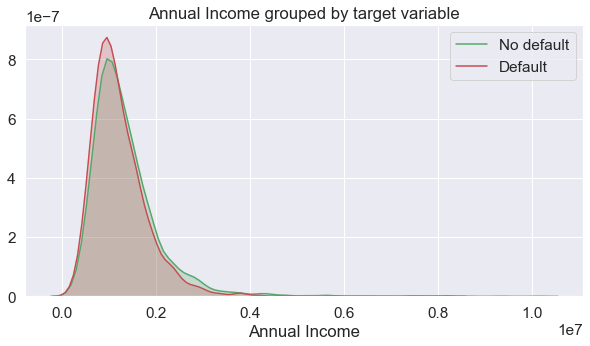

In [162]:
plt.figure(figsize=(10, 5))

sns.kdeplot(annual_target_0, shade=True, label='No default', color='g')
sns.kdeplot(annual_target_1, shade=True, label='Default', color='r')

plt.xlabel('Annual Income')
plt.title('Annual Income grouped by target variable')
plt.show()

In [163]:
df[annual_income], lambdas['annual_income_lambda'] = sp.stats.yeojohnson(df[annual_income])

In [164]:
annual_target, annual_target_0, annual_target_1 = get_feature_target_dfs(df, annual_income)

In [165]:
sp.stats.ttest_ind(annual_target_0, annual_target_1)

Ttest_indResult(statistic=6.706557067054143, pvalue=2.1450628393228446e-11)

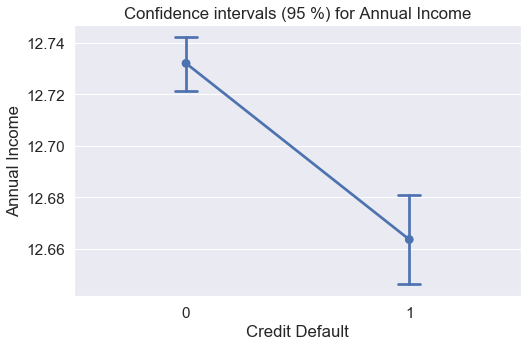

In [166]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_COLUMN, y='Annual Income', data=annual_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual Income')
plt.show()

Признак статистически значим, принимается:

In [167]:
NUM_FEATURES.append(annual_income)

### Months since last delinquent

In [168]:
df['Months since last delinquent'].count()

3278

Признак имеет больше половины пропусков - не рассматривается

### Credit Score

In [169]:
credit_score = 'Credit Score'

Изучим распределение значений:

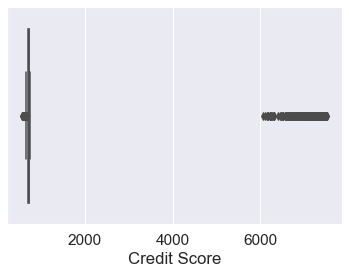

In [170]:
sns.boxplot(df['Credit Score'])

In [171]:
df.loc[df[credit_score] > 6000, TARGET_COLUMN].value_counts()

1    384
Name: Credit Default, dtype: int64

Заметим что при score >=6000 всегда наступает дефолт. Сделаем из этого наблюдения отдельный бинарный признак

In [172]:
df['Credit Score Max'] = df[credit_score] >= 6000
df['Credit Score Max'] = df['Credit Score Max'].apply(lambda x: 1 if x else 0)

In [173]:
CAT_FEATURES.append('Credit Score Max')

In [175]:
df.loc[:, credit_score].median()

731.0

Сместим значения признака >6000 в медиану признака при целевом =1

In [176]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: 731 if x >= 6000 else x)
df[credit_score].describe()

count    5665.000000
mean      721.171933
std        26.743005
min       585.000000
25%       711.000000
50%       731.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64

Заполним пропуски, применив регрессию:

In [177]:
df1 = deepcopy(df)

In [178]:
df1.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Term,...,Credit Score,Credit Default,Purpose_0,Purpose_1,Purpose_2,tax_problems_0,tax_problems_1,tax_problems_2,Current Loan Max,Credit Score Max
0,0,11.976092,0,0,3.203605,1,83.234273,0,NaN,0,...,749.0,0,1,0,0,0,1,0,1,0
1,0,12.603328,1,0,3.685878,1,94.416025,0,NaN,1,...,737.0,1,1,0,0,0,1,0,0,0
2,1,12.345702,1,0,3.203605,0,94.429018,0,NaN,0,...,742.0,0,1,0,0,0,1,0,1,0
3,0,12.402938,1,0,2.747838,0,57.999051,0,NaN,0,...,694.0,0,1,0,0,0,1,0,0,0
4,0,12.372710,1,0,3.458633,1,72.777459,0,NaN,0,...,719.0,0,1,0,0,0,1,0,0,0


In [179]:
CAT_FEATURES

['Years in current job',
 'Home Ownership',
 'Term',
 'Years of Credit History',
 'Purpose_0',
 'Purpose_1',
 'Purpose_2',
 'tax_problems_0',
 'tax_problems_1',
 'tax_problems_2',
 'Current Loan Max',
 'Credit Score Max']

In [180]:
df1 = df1[['Years in current job', 'Home Ownership', 'Term', 'Years of Credit History', 'Purpose_0',
 'Purpose_1', 'Purpose_2', 'tax_problems_0', 'tax_problems_1', 'tax_problems_2',
 'Current Loan Max',]+['Maximum Open Credit', 'Number of Open Accounts',
                        'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Annual Income', 'Credit Score']]

In [181]:
df_score_train = df1.loc[df1['Credit Score']>0]
df_score_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5665 entries, 0 to 7497
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Years in current job     5665 non-null   uint8  
 1   Home Ownership           5665 non-null   uint8  
 2   Term                     5665 non-null   uint8  
 3   Years of Credit History  5665 non-null   uint8  
 4   Purpose_0                5665 non-null   uint8  
 5   Purpose_1                5665 non-null   uint8  
 6   Purpose_2                5665 non-null   uint8  
 7   tax_problems_0           5665 non-null   uint8  
 8   tax_problems_1           5665 non-null   uint8  
 9   tax_problems_2           5665 non-null   uint8  
 10  Current Loan Max         5665 non-null   int64  
 11  Maximum Open Credit      5665 non-null   float64
 12  Number of Open Accounts  5665 non-null   float64
 13  Current Loan Amount      5665 non-null   float64
 14  Current Credit Balance  

In [182]:
df_score_res = df1.loc[pd.isnull(df1['Credit Score'])]

In [183]:
scaler = StandardScaler()

In [184]:
NUM_FEAT = ['Maximum Open Credit', 'Number of Open Accounts',
            'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt']

In [185]:
df_score_train[NUM_FEAT] = scaler.fit_transform(df_score_train[NUM_FEAT])

<ipython-input-185-abcd305591d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score_train[NUM_FEAT] = scaler.fit_transform(df_score_train[NUM_FEAT])
/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [186]:
with open('score_scaler.bin', 'wb') as f:
    pickle.dump(scaler, f)

In [187]:
params = {
    'min_samples_leaf':[3, 5, 7, 10], 
    'n_estimators':[25, 50, 75, 100], 
    'max_depth':[3, 5, 7, 10],}
regr = GridSearchCV(RFR(),param_grid=params,cv=2)

In [188]:
FEATURES = ['Years in current job', 'Home Ownership', 'Term', 'Years of Credit History', 'Purpose_0',
 'Purpose_1', 'Purpose_2', 'tax_problems_0', 'tax_problems_1', 'tax_problems_2',
 'Current Loan Max', 'Maximum Open Credit', 'Number of Open Accounts',
                        'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt']

In [189]:
regr.fit(df_score_train.loc[:, FEATURES], df_score_train['Credit Score'])

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [190]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 50}

In [191]:
regr.best_score_

0.26734156060221503

In [192]:
regressor = RFR(max_depth=10, min_samples_leaf=7, n_estimators=100, n_jobs=-1)

In [193]:
regressor.fit(df_score_train.loc[:, FEATURES], df_score_train['Credit Score'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [194]:
df_score_train['Credit Score'].describe()

count    5665.000000
mean      721.171933
std        26.743005
min       585.000000
25%       711.000000
50%       731.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64

In [195]:
with open('score_regressor.bin', 'wb') as f:
    pickle.dump(regressor, f)

In [196]:
df_score_res.loc[:, NUM_FEAT] = scaler.transform(df_score_res.loc[:, NUM_FEAT])

/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [197]:
df_score_res.loc[:, 'Credit Score'] = regressor.predict(df_score_res.loc[:, FEATURES])
df_score_res['Credit Score'].describe()

/Users/kosmosivanov/git-repo/Python_DS_more/virt_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


count    1474.000000
mean      721.662276
std        13.951682
min       668.561701
25%       715.557418
50%       725.590838
75%       730.673960
max       746.368320
Name: Credit Score, dtype: float64

In [198]:
df.loc[df_score_res.index, 'Credit Score'] = df_score_res['Credit Score']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 0 to 7499
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7139 non-null   uint8  
 1   Annual Income                 7139 non-null   float64
 2   Years in current job          7139 non-null   uint8  
 3   Tax Liens                     7139 non-null   int64  
 4   Number of Open Accounts       7139 non-null   float64
 5   Years of Credit History       7139 non-null   uint8  
 6   Maximum Open Credit           7139 non-null   float64
 7   Number of Credit Problems     7139 non-null   int64  
 8   Months since last delinquent  3278 non-null   float64
 9   Term                          7139 non-null   uint8  
 10  Current Loan Amount           7139 non-null   float64
 11  Current Credit Balance        7139 non-null   float64
 12  Monthly Debt                  7139 non-null   float64
 13  Cre

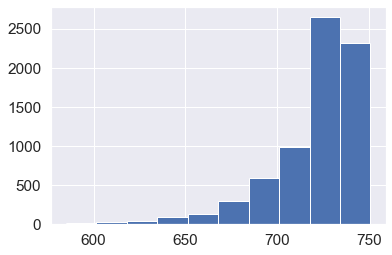

In [199]:
df[credit_score].hist()

In [207]:
score_norm, lambdas['credit_score_lambda'] = sp.stats.boxcox(df[credit_score])

(array([ 293.,  474.,  594.,  665.,  809., 1063., 1228.,  951.,  570.,
         492.]),
 array([2.09392695e+50, 2.39424317e+51, 4.57909364e+51, 6.76394411e+51,
        8.94879458e+51, 1.11336451e+52, 1.33184955e+52, 1.55033460e+52,
        1.76881965e+52, 1.98730469e+52, 2.20578974e+52]),
 <a list of 10 Patch objects>)

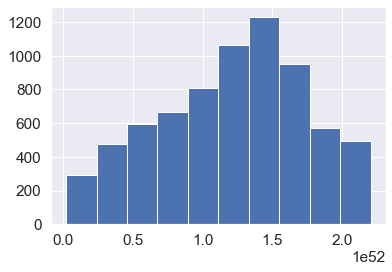

In [211]:
score_target, score_target_0, score_target_1 = get_feature_target_dfs(df, credit_score)

In [213]:
sp.stats.mannwhitneyu(score_target_0, score_target_1)

MannwhitneyuResult(statistic=4059146.5, pvalue=2.1446525099735657e-47)

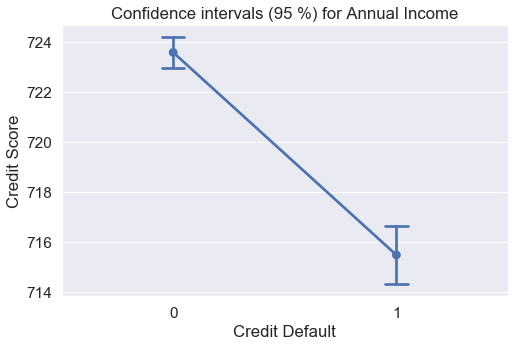

In [214]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_COLUMN, y='Credit Score', data=score_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual Income')
plt.show()

Статистически значима, принимается

In [215]:
NUM_FEATURES.append(credit_score)

### Численные признаки

In [216]:
NUM_FEATURES

['Maximum Open Credit',
 'Current Loan Amount',
 'Number of Open Accounts',
 'Monthly Debt',
 'Annual Income',
 'Credit Score']

## Отбор признаков

In [217]:
features = NUM_FEATURES + CAT_FEATURES
features_target = features + [TARGET_COLUMN, ]
features_target

['Maximum Open Credit',
 'Current Loan Amount',
 'Number of Open Accounts',
 'Monthly Debt',
 'Annual Income',
 'Credit Score',
 'Years in current job',
 'Home Ownership',
 'Term',
 'Years of Credit History',
 'Purpose_0',
 'Purpose_1',
 'Purpose_2',
 'tax_problems_0',
 'tax_problems_1',
 'tax_problems_2',
 'Current Loan Max',
 'Credit Score Max',
 'Credit Default']

In [218]:
df = df[features_target]

In [219]:
df.describe()

,Maximum Open Credit,Current Loan Amount,Number of Open Accounts,Monthly Debt,Annual Income,Credit Score,Years in current job,Home Ownership,Term,Years of Credit History,Purpose_0,Purpose_1,Purpose_2,tax_problems_0,tax_problems_1,tax_problems_2,Current Loan Max,Credit Score Max,Credit Default
count,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000
mean,76.169670,252.838386,3.099173,155.317899,12.712584,721.273175,0.950693,0.476537,0.258299,0.679367,0.977168,0.018910,0.003922,0.006724,0.979829,0.013447,0.114722,0.053789,0.284914
std,12.898221,54.498898,0.626737,43.572186,0.390639,24.651753,0.216523,0.499484,0.437730,0.466753,0.149379,0.136218,0.062508,0.081727,0.140594,0.115188,0.318708,0.225617,0.451405
min,24.203851,99.501000,1.226202,9.576656,11.071775,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.325454,217.706331,2.747838,126.784729,12.465403,712.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,76.039566,251.165905,3.063028,155.310890,12.706314,728.593526,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,84.983117,289.285611,3.458633,184.245408,12.959821,738.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,110.311751,374.341857,4.966237,287.023393,14.468758,751.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maximum Open Credit      7139 non-null   float64
 1   Current Loan Amount      7139 non-null   float64
 2   Number of Open Accounts  7139 non-null   float64
 3   Monthly Debt             7139 non-null   float64
 4   Annual Income            7139 non-null   float64
 5   Credit Score             7139 non-null   float64
 6   Years in current job     7139 non-null   uint8  
 7   Home Ownership           7139 non-null   uint8  
 8   Term                     7139 non-null   uint8  
 9   Years of Credit History  7139 non-null   uint8  
 10  Purpose_0                7139 non-null   uint8  
 11  Purpose_1                7139 non-null   uint8  
 12  Purpose_2                7139 non-null   uint8  
 13  tax_problems_0           7139 non-null   uint8  
 14  tax_problems_1          

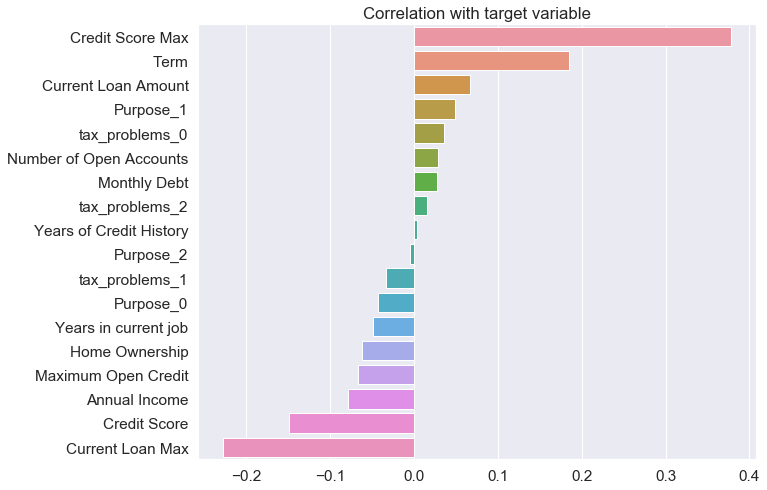

In [221]:
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

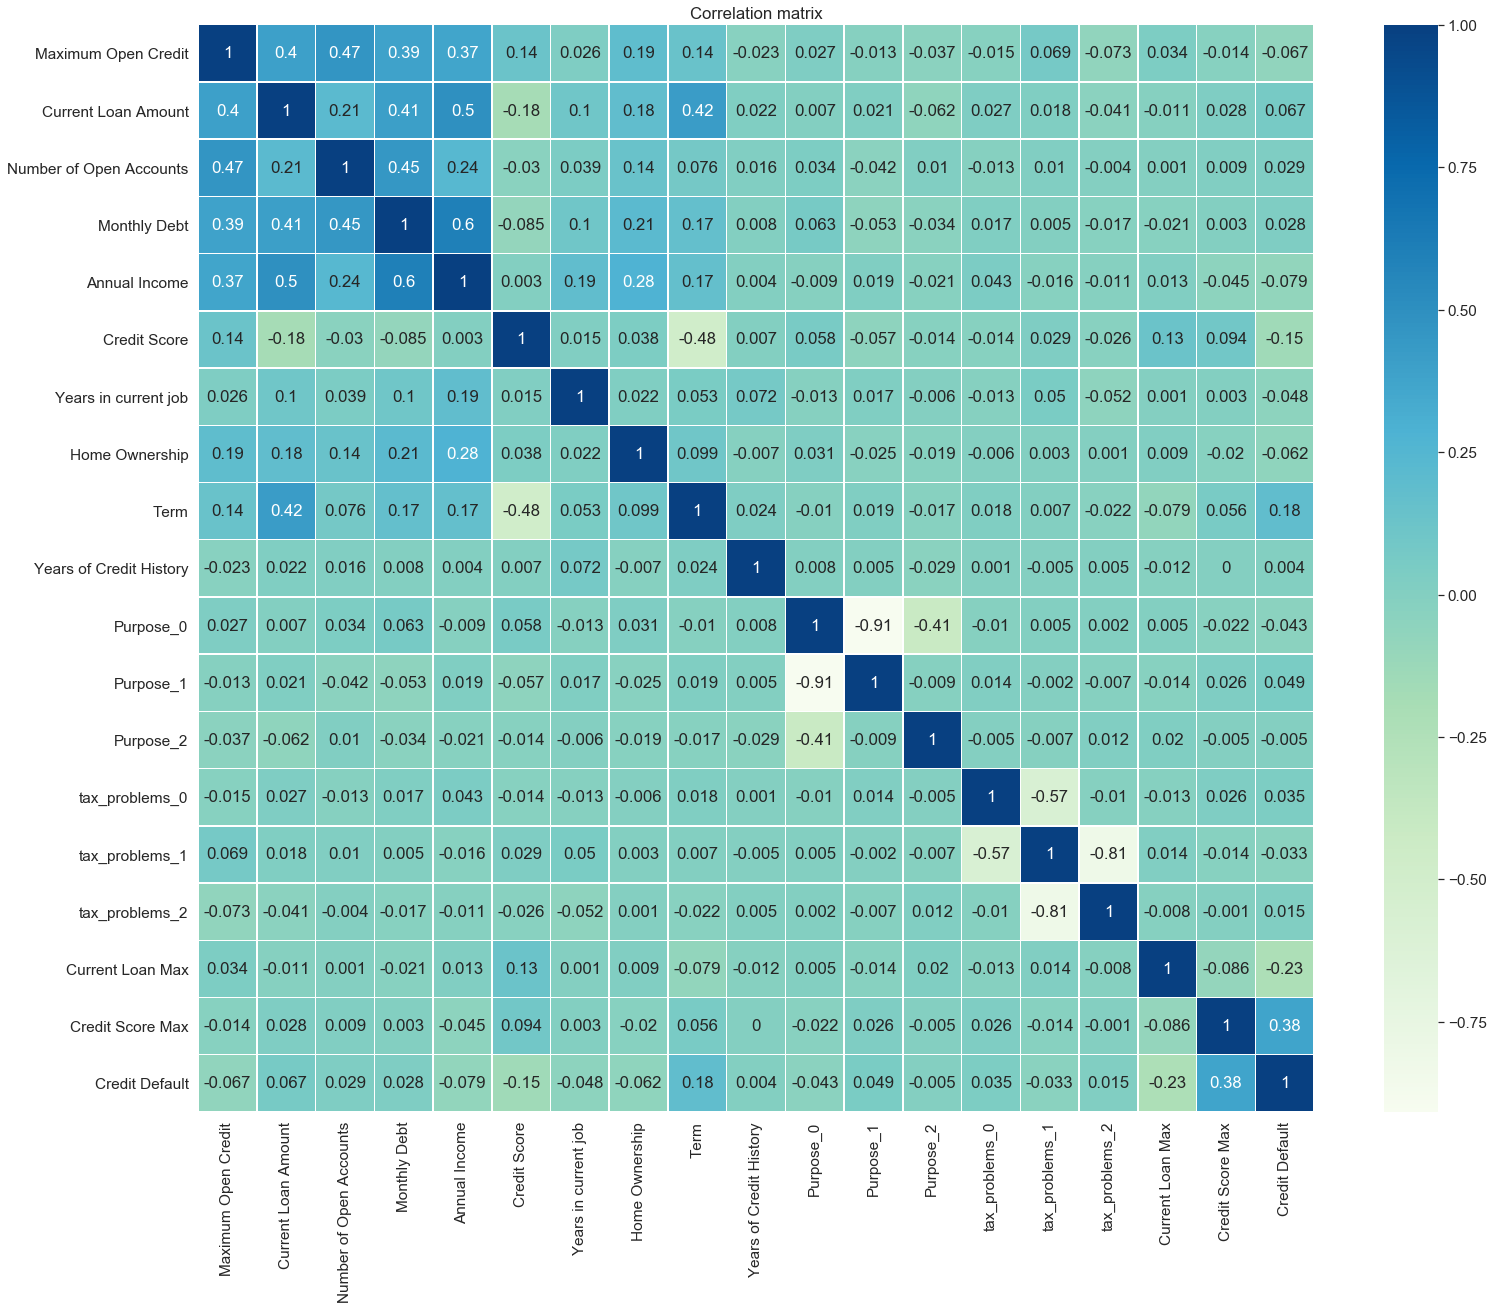

In [222]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [ ]:
df.to_pickle('features.df')

In [ ]:
lambdas

In [ ]:
import pickle

In [ ]:
with open('lambdas.bin', 'wb') as f:
    pickle.dump(lambdas, f)

In [ ]:
df['Credit Score'].describe()

In [224]:
lambdas

{'max_credit_lambda': 0.22046164596449688,
 'credit_balance_lambda': 0.35171364548679723,
 'loan_amount_lambda': 0.3620896643157912,
 'number_accounts_lambda': 0.19648893786669672,
 'month_dept_lambda': 0.438109113536189,
 'annual_income_lambda': -0.013750754533739432,
 'credit_score_lambda': 18.64423567315302}

In [225]:
import pickle

In [226]:
with open('lambdas.bin', 'wb') as f:
    pickle.dump(lambdas, f)

In [215]:
df['Credit Score'].describe()

count    7.139000e+03
mean     6.459578e+51
std      2.815987e+51
min      1.163536e+50
25%      4.423518e+51
50%      6.724651e+51
75%      8.595132e+51
max      1.187710e+52
Name: Credit Score, dtype: float64